In [1]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

Using TensorFlow backend.


In [2]:
# y_trainが正解タグデータ
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# データの整形&正規化
X_train = X_train.reshape(60000,784) / 255
X_test = X_test.reshape(10000, 784) / 255

print(X_train.shape)
print(X_test.shape)

In [4]:
# 1行のデータが28*28の1つの数字を表している
# データは0-1までの少数で表現されており、これは濃淡の程度を表している
X_train[0][200:210]

array([ 0.        ,  0.        ,  0.        ,  0.19215686,  0.93333333,
        0.99215686,  0.99215686,  0.99215686,  0.99215686,  0.99215686])

描かれている数字: 1


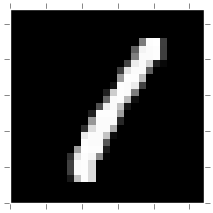

In [6]:
idx = 0
size = 28

a, b = np.meshgrid(range(size), range(size))
c = X_train[idx].reshape(size, size)
c = c[::-1,:]

print('描かれている数字: {}'.format(y_train[idx]))

plt.figure(figsize=(2.5, 2.5))
plt.xlim(0, 27)
plt.ylim(0, 27)
plt.tick_params(labelbottom="off")
plt.tick_params(labelleft="off")
plt.pcolor(a, b, c)
plt.gray()

In [7]:
# ダミーコーディング
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:
#  arrayに1が立っている部分がその数字である、というふうに表示させている。
# 今回の場合は0,1,2,3,4,5,6,7,8,9 のうち5を選択しているので、6番目にフラグが立っている
# というようにもともと数値ではないものを数値化するのがダミーコーディング
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [9]:
# 1ノードにくるデータは重み付けされている。それを全て集約して、ノード内で次元圧縮する（活性化関数を使って）

In [10]:
# DLのモデル作成
from keras.layers import Dense, Activation
from keras.layers.core import Dropout
from keras.models import Sequential

In [12]:
model = Sequential()
# Dense = 層 activation = 活性化関数 
# 隠れ層
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
# 出力層(いくつかのカテゴライズを行う場合はsoftmaxと使う)
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, batch_size=200, verbose=1, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s - loss: 2.0855 - acc: 0.4706      

In [16]:
score = model.evaluate(X_test, y_test, verbose=1)

 9280/10000 [==========================>...] - ETA: 0s

In [17]:
score[1]

0.87260000000000004

In [20]:
# 活性化関数の変更
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# 活性化関数リスト
# https://keras.io/ja/activations/

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=200, verbose=1, epochs=10)
score = model.evaluate(X_test, y_test, verbose=1)
#score[0]はロス
score[1]

Epoch 1/10
60000/60000 [==============================] - 8s - loss: 1.3128 - acc: 0.7084      

0.91879999999999995

In [23]:
# 最適化関数の変更
# https://keras.io/ja/optimizers/
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=200, verbose=1, epochs=10)
score = model.evaluate(X_test, y_test, verbose=1)
score[1]

Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.3042 - acc: 0.9155      

0.98099999999999998

In [24]:
# Dropout(汎化性能up/過学習防止)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=200, verbose=1, epochs=10)
score = model.evaluate(X_test, y_test, verbose=1)
score[1]


Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.3229 - acc: 0.9084      

0.9819